# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Цель исследования:**

Выделить какие факторы больше всего влияют на стоимость квартир.

**Задачи исследования:**

- Изучить площадь, цену, число комнат, высоту потолков.
- Изучить время продажи квартиры. Понять сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго.
- Убрать редкие и выбивающиеся значения. 
- Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 
- Выделить квартиры в Санкт-Петербурге и выяснить, какая область входит в центр.
- Выделить сегмент квартир в центре. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравнить с общими выводами по всему городу.

По каждой квартире на продажу доступны **два вида данных**. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

О качестве данных ничего не известно. Поэтому перед выявлением закономерностей понадобится обзор данных, а так же проверка данных на ошибки и оценка их влияния на исследование.

Таким образом, исследование пройдет в несколько этапов:
1. Открыть файл с данными и изучить общую информацию
2. Предобработка данных
- определить и изучить пропущенные значения
- заполнить пропуски, где это уместно
- указать причины, которые могли привести к пропускам в данных
- привести данные к нужным типам
3. Посчитать и добавить в таблицу:
- цену квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей
4. Провести исследовательский анализ данных и решить поставленные задачи
5. Сформулировать общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-цены" data-toc-modified-id="Распределение-цены-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Распределение цены</a></span></li><li><span><a href="#Распределение-количества-комнат" data-toc-modified-id="Распределение-количества-комнат-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение количества комнат</a></span></li><li><span><a href="#Распределение-общей-площади." data-toc-modified-id="Распределение-общей-площади.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Распределение общей площади.</a></span></li><li><span><a href="#Распределение-жилой-площади." data-toc-modified-id="Распределение-жилой-площади.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Распределение жилой площади.</a></span></li><li><span><a href="#Распределение-площади-кухни." data-toc-modified-id="Распределение-площади-кухни.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Распределение площади кухни.</a></span></li><li><span><a href="#Распределение-времени-продажи-квартиры-(размещения-объявления-от-публикации-до-снятия)." data-toc-modified-id="Распределение-времени-продажи-квартиры-(размещения-объявления-от-публикации-до-снятия).-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Распределение времени продажи квартиры (размещения объявления от публикации до снятия).</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li><li><span><a href="#Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-этажа" data-toc-modified-id="Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-этажа-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Распределение стоимости квартиры и квадратного метра в зависимости от этажа</a></span></li><li><span><a href="#Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-года" data-toc-modified-id="Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-года-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Распределение стоимости квартиры и квадратного метра в зависимости от года</a></span></li><li><span><a href="#Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-месяца" data-toc-modified-id="Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-месяца-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Распределение стоимости квартиры и квадратного метра в зависимости от месяца</a></span></li><li><span><a href="#Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-дня-недели" data-toc-modified-id="Распределение-стоимости-квартиры-и-квадратного-метра-в-зависимости-от-дня-недели-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Распределение стоимости квартиры и квадратного метра в зависимости от дня недели</a></span></li><li><span><a href="#Населенные-пункты-с-наибольшим-числом-объявлений" data-toc-modified-id="Населенные-пункты-с-наибольшим-числом-объявлений-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Населенные пункты с наибольшим числом объявлений</a></span></li><li><span><a href="#Квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Квартиры-в-центре-Санкт-Петербурга-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Квартиры в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from pymystem3 import Mystem
m = Mystem()

from collections import Counter

Откроем файл и прочитаем первые 10 строк.

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except Exception as err:
    try:
        df = pd.read_csv('real_estate_data.csv', sep='\t')
    except Exception as err:
        print('Ошибка чтения файла:', repr(err))

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 23699 строк, соответсвующих объявлению о продаже квартиры, и 22 столбца.

### Описание данных
Вместе с данными шло объяснения значений в каждой из колонок.
- `total_images` — число фотографий квартиры в объявлении
- `last_price` — цена на момент снятия с публикации
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `first_day_exposition` — дата публикации
- `rooms` — число комнат
- `ceiling_height` — высота потолков (м)
- `floors_total` — всего этажей в доме
- `living_area` — жилая площадь в квадратных метрах (м²)
- `floor` — этаж
- `is_apartment` — апартаменты (булев тип)
- `studio` — квартира-студия (булев тип)
- `open_plan` — свободная планировка (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `balcony` — число балконов
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

### Вывод

- В каждой строке таблицы - объявление о продаже квартиры. 
- Часть из 22 колонок предоставлены пользователем (например, количество комнат, балконов, фотографий в объявлении, площадь квартиры и жилая, является ли квартира студией или апартаментами), остальные получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).
- В таблице **23699 объявления**, однако не в каждом заполнены все параметры: не все пользователи предоставили данные о высоте потолков, количестве балконов и даже жилой площади и пр. Так же не для каждой квартиры автоматически были рассчитаны расстояния до центра, аэропорта, парка и водоёма. 
- Наибольшее количество пропусков в колонках, указывающих на количество балконов и является ли квартира апартаментами не критичны, так как скорее всего эти квартиры не имеют балконов и не являются апартаментами. Также  не является критичным и большое количество пропусков в колонках с количеством парков и водоемов поблизости, так как скорее всего поблизости их нет.
- Типы данных в некоторых колонках подлежат замене: дата публикации, количество балконов и пр.
- Нарушен стиль в названии колонки cityCenters_nearest.
- Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных.

## Предобработка данных

Подсчитаем количество пропусков в каждой колонке.

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таблице пропуски есть в 14 колонках. От некоторых можно будет избавиться, восстановив данные. Остальные показательнее будет оставить пустыми.

Пользователи, не указавшие количество балконов, вероятнее всего, продают квартиру без балконов. Заменим отсутствующие значения в колонке `balcony` на 0.

In [7]:
df['balcony'] = df['balcony'].fillna(0)

Пользователи, не указавшие является ли квартира апартаментами, скорее всего продают не апартаменты.

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Так же заменим пропуски в названии населенного пункта явным обозначением `unknown`, поскольку восстановить данные в этой колонке по значениям других не представляется возможным. Вероятнее всего данные были утеряны, либо невнимательный пользователь забыл указать, где продаёт квартиру.

In [9]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Количество этажей в доме восстановить не представляется возможным - квартиры с пропусками в данной колонке находятся в разных населенных пунктах на этажах от первого до двадцать четвертого. Скорее всего пользователи не посчитали нужным уточнить эти данные. 

Ввиду сильных разбросов квартир с пропусками по населенным пунктам так же поступим и для пропусков в колонках с расстояниями до аэропорта, центра города, парков и водоемов и их количеством  в радиусе трёх километров. Возможно, для некоторых квартир или даже населенных пунктов такая информация не была подсчитана ввиду неактуальности.

Невозможно по остальным колонкам восстановить и сколько дней было размещено объявление (от публикации до снятия). Пропуски могли появиться в результате сбоя автоматического подсчета дней размещения объявления.

Соответственно, в колонках `floors_total`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition` оставим исходное значение `NaN`.

<a id='ceiling'>Высота потолка </a> является важным параметром и вполне предсказуемым. 

[Согласно СНиП](https://www.project-home.ru/info/clauses/komfortnaya-vysota-potolkov-v-chastnom-dome), нормативное значение минимальной высоты жилых помещений зависит от региона строительства дома. В холодных климатических зонах (Заполярье, северные регионы Сибири и Дальнего Востока) эта величина составляет 2,7 м, в умеренных и южных – 2,5 м. Эти нормы рассчитаны, исходя из условий создания нормального микроклимата в комнатах.
Для максимальной высоты потолка в частном доме нормативы также отсутствуют. Максимальный уровень потолков СНиП вообще не регламентируют. Практика показывает, что в современных многоквартирных домах он, как правило, не поднимается выше 3,2 м. Высота домов сталинской постройки составляет 3,3-3,6 м. 

Учитывая эти значения, изучим колонку с высотой потолков.

In [10]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков составила 2,77 м, медиана 2,65 м. Однако сами значения имеют слишком большой разброс и составляют от 1 до 100 м.

Взглянем на <a id='ceiling_high'>аномально высокие потолки</a>.

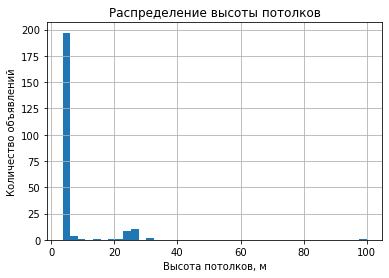

In [11]:
df[df.ceiling_height > 3.6].hist('ceiling_height', bins=40)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

Высота потолка в 100 м - выброс. Высота выше 20 скорее всего указана в дециметрах. 

In [12]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 20, df['ceiling_height'] / 10)

Посмотрим на гистограмму после замены дециметров на метры.

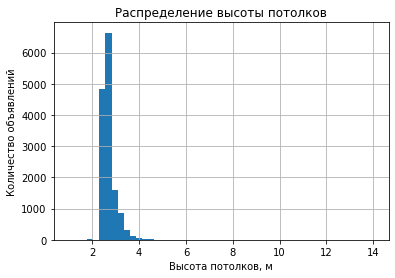

In [13]:
df.hist('ceiling_height', bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

Сто метров стали десятью, но всё равно остались выбросами. 

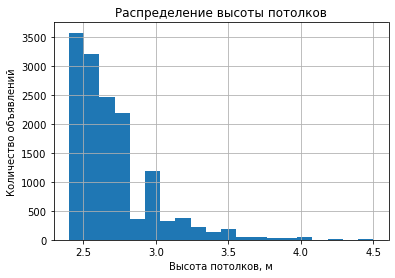

In [14]:
df.hist('ceiling_height', range=(2.4, 4.5), bins=20)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

Рассмотрение гистограммы в разных диапазонах range показывает, что для дальней оценки зависимости стоимости квартиры приемлемые границы высоты потолка составляют от 2.4 до 4.5 м.

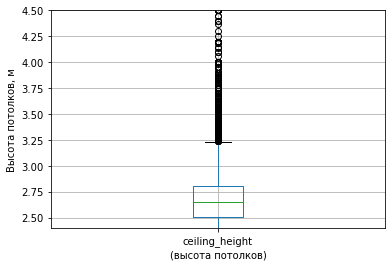

In [15]:
plt.ylim(2.4, 4.5)
df.boxplot('ceiling_height')
plt.ylabel('Высота потолков, м')
plt.xlabel('(высота потолков)')
plt.show()

Диаграмма размаха с первого взгляда противоречит выбранным данным, но потолков ниже 2.4 м не слишком много, и это могут быть ошибки в значениях, а вот потолки свыше нормы могут указывать на "элитность жилья" и увеличивать его стоимость. 

В данной колонке могут оставаться значения с выбросами и пропусками. От них мы предпочли не избавляться ни удалением строк с пропусками, ни заменой на медианные значения. Данное решение было принято ввиду того, что для каждого объявления у нас имеется цена и выяснить, от каких параметров она зависит, является целью исследования. Если заменить пропуски, можно исказить влияние высоты потолка на стоимость жилья. Если же просто удалить эти строки из таблицы, то мы потеряем данные для выяснения зависимости цены от других параметров.

Лучшим решением на данный момент представляется создание дополнительного столбца `ceiling_is_correct` с булевыми значениями, в котором будет указано, считаем ли мы данные в столбце `ceiling_height` корректными для выявления закономерности.

In [16]:
df['ceiling_is_correct'] = (2.4 <= df['ceiling_height']) & (df['ceiling_height'] <= 4.5)

In [17]:
df['ceiling_is_correct'].mean()

0.610194522975653

61% данных о высоте потолка мы считаем корректными для проведения исследования.

Жилая площадь - так же важная характеристика, в которой есть пропуски, поэтому глянем на её распределение.

In [18]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Среднее значение жилой площади 34 м², медианное - 30 м². Значения варьируют от 2 до 410 м². Жилые площади меньше 8 м² вызывают некоторые сомнения, поэтому было решено подробнее с ними ознакомиться.

In [19]:
df[df.living_area < 8][['living_area', 'kitchen_area', 'total_area', 'locality_name', 'is_apartment', 'last_price', 'studio']]

,living_area,kitchen_area,total_area,locality_name,is_apartment,last_price,studio
3242,3.0,11.0,41.0,Санкт-Петербург,False,4440000.0,False
13915,2.0,9.0,52.0,Санкт-Петербург,False,6350000.0,False
16431,6.0,17.0,31.0,Санкт-Петербург,False,3799000.0,False
17582,5.0,NaN,22.0,Санкт-Петербург,False,2680000.0,True
19251,6.5,18.0,33.0,Санкт-Петербург,False,4050000.0,False
21758,2.0,NaN,23.0,посёлок Мурино,False,2330000.0,True
21943,5.4,9.8,77.6,Санкт-Петербург,False,6100000.0,False
23574,3.0,16.0,139.0,Санкт-Петербург,False,64990000.0,False


Всего 8 квартир, поэтому учитывая, что в Санкт-Петербурге можно было приобрести [студию в 12м²](https://www.novostroy.su/news/edition/top-8-samykh-malenkikh-kvartir-i-apartamentov-v-novostroykakh-peterburga/), данные решено было оставить без изменений, так как планировка таких квартир не известна и требует уточнений.

Проверка корреляции выяслила, что площадь жилая хорошо коррелирует с общей.

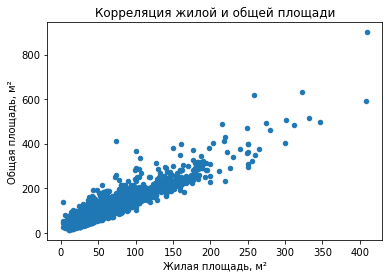

In [20]:
df.plot(x='living_area', y='total_area', kind='scatter', title='Корреляция жилой и общей площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Общая площадь, м²')
plt.show()

In [21]:
df['living_area'].corr(df['total_area'])

0.9395373338721501

Согласно этим данным, было решено заменить пропуски в зависимости от значений общей площади.

In [22]:
(df.living_area / df.total_area).describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
dtype: float64

Так как и среднее, и медианное значение отношения жилой к общей площади составило 0.56, применим этот коэффициент для замены пропущенных значений.

In [23]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.56)

Так же с пропусками у нас осталась колонка с площадью кухни. Взглянем на ее данные.

In [24]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Средняя площадь кухни 11 м², медианная - 9 м2. Площадь варьируетя от 1 до 112 м². Рассмотрим маленькие кухни. 

In [25]:
df[df['kitchen_area'] < 3][['living_area', 'kitchen_area', 'total_area', 'locality_name', 'is_apartment', 'last_price', 'studio', 'open_plan']].sort_values(by='kitchen_area')

,living_area,kitchen_area,total_area,locality_name,is_apartment,last_price,studio,open_plan
20217,19.5,1.30,28.50,Санкт-Петербург,False,4250000.0,False,False
906,18.0,2.00,27.00,Санкт-Петербург,False,2600000.0,False,False
6262,16.0,2.00,24.00,Санкт-Петербург,False,3100000.0,False,False
9138,21.0,2.00,23.29,Санкт-Петербург,False,2920000.0,False,False
11033,16.0,2.00,32.00,Санкт-Петербург,False,5350000.0,False,False
16367,22.6,2.00,25.70,Санкт-Петербург,False,2720000.0,False,False
19642,11.0,2.00,14.00,Санкт-Петербург,False,1190000.0,False,False
21419,14.0,2.00,20.00,Санкт-Петербург,False,1870000.0,False,False
17834,15.5,2.30,34.70,посёлок Мурино,False,2940000.0,False,False
8729,14.0,2.40,18.40,Пушкин,False,2200000.0,False,False


Что-то неладное творится в Санкт-Петербурге с размерами кухонь, так как встречаются кухни меньше 3 м², но их всего 11 из всей таблицы и они могут так же принадлежать квартирам с нестандартными планировками.

Проверим, можно ли восстановить данные по площади кухни из других значений.

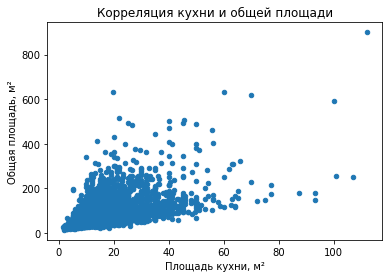

In [26]:
df.plot(x='kitchen_area', y='total_area', kind='scatter', title='Корреляция кухни и общей площади')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Общая площадь, м²')
plt.show()

In [27]:
df['kitchen_area'].corr(df['total_area'])

0.6091211711198313

Самая большая взаимосвязь у размеров кухни с общей площадью, но корреляция не достаточная, чтобы восстановить значения. Поэтому оставим пропуски в таблице.

Далее следует привести название колонок к единому стилю. Избавимся от заглавных букв.

In [28]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Проверим тип данных в колонках.

In [29]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
ceiling_is_correct         bool
dtype: object

Видим, что числовые значения представлены двумя типами данных: int64 и float64. Библиотека `pandas` присваивает их по умолчанию. Это требует большего объёма памяти, чем нужно для наших вычислений.

Например: int64 - принимает целое значение от -9223372036854775808 до 9223372036854775807.

- Соответственно, для колонок `floor`, `total_images`, `rooms`, `balcony` хватит памяти, выделяемой для int8, принимающего значения от -128 до 127.
- А для колонки `last_price` будет достаточно int32, принимающего значения от -2147483648 до 2147483647.

К сожалению, некоторые колонки мы не можем преобразовать в тип int, так как они содержат пропуски.

Для изменения типа данных выбираем метод astype(), потому как он позволяет явно задать желаемый тип данных.


In [30]:
for column in ['floor', 'total_images', 'rooms', 'balcony']:
    df[column] = df[column].astype('int8')

In [31]:
df['last_price'] = df['last_price'].astype('int32')

Колонка `first_day_exposition` должна иметь тип данных для даты.     

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В колонке `locality_name` возможны неявные дубликаты - лемматизируем данные.

Посмотрим уникальные значения населённых пунктов.

In [33]:
locality = df['locality_name'].sort_values().unique()
locality

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Видим, что есть дублирование в названии `поселок`, `посёлок` и пр. Приведём их к единому стилю и заменим на вариант `поселок`. А также `садоводческое некоммерческое товарищество` на `садовое товарищество`. Чтобы избежать дубликатов в названиях с `ё` и `е` было решено, к сожалению, отказаться от `ё`.

In [34]:
for name in ['посёлок', 
             'городской поселок', 
             'городской посёлок', 
             'поселок городского типа', 
             'посёлок городского типа', 
             'посёлок при железнодорожной станции', 
             'посёлок станции',
             'посёлок имени',
             'коттеджный посёлок']:
    df['locality_name'] = df['locality_name'].str.replace(name,'поселок')

df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

Обновим переменную `locality`.

In [35]:
locality = df['locality_name'].sort_values().unique()

Далее посмотрим, леммы каких слов встречаются в колонке чаще всего.

In [36]:
lemmas_list = []
for city in locality:
    lemmas = m.lemmatize(city)
    for lemma in lemmas:
        lemmas_list.append(lemma)

Counter(lemmas_list).most_common(40)

[(' ', 341),
 ('\n', 323),
 ('поселок', 159),
 ('деревня', 106),
 ('село', 10),
 ('-', 10),
 ('станция', 8),
 ('бор', 6),
 ('большой', 6),
 ('старый', 6),
 ('новый', 5),
 ('садовый', 5),
 ('товарищество', 5),
 ('красный', 4),
 ('малый', 4),
 ('коттеджный', 3),
 ('лесной', 3),
 ('коммунар', 2),
 ('кудрово', 2),
 ('луг', 2),
 ('любань', 2),
 ('муриный', 2),
 ('никольское', 2),
 ('ладога', 2),
 ('сосновый', 2),
 ('бегуница', 2),
 ('колпана', 2),
 ('гарболовый', 2),
 ('зимитиц', 2),
 ('романовка', 2),
 ('нижний', 2),
 ('рабитиц', 2),
 ('федоровский', 2),
 ('щегловый', 2),
 ('тесовый', 2),
 ('ижора', 2),
 ('громовый', 2),
 ('горка', 2),
 ('павлово', 2),
 ('поляна', 2)]

Выяснено, что помимо пропусков, поселка, деревни и прочего в леммах встречается дублирование и некоторых названий.

Для дальнейшей проверки на дубликаты была выбрана тактика разбить название населённого пункта на тип населённого пункта и на само название. Для этого были написаны две функции. Функция `name_split` принимает колонку таблицы и проверяет её на заглавные буквы, так как все названия населенных пунктов у нас указаны с заглавной. Функция возвращает название населенного пункта. Функция `type_split` делает то же самое, но возвращает все слова, начинающиеся со строчной буквы.

In [37]:
def name_split(col):
    name = []
    for i in col.split():
        if i.istitle():
            name.append(i)
    return ' '.join(name)

def type_split(col):
    type = []
    for i in col.split():
        if not i.istitle():
            type.append(i)
    if len(type) > 0:
        return ' '.join(type)

Далее применяем эти функции для создания дополнительных столбцов только с названием населенного пункта и только с типом населенного пункта.

In [38]:
df['locality_name_right'] = df['locality_name'].apply(name_split)
df['locality_type'] = df['locality_name'].apply(type_split)

Теперь посмотрим, какие из названий населенных пунктов имеют больше одного типа населенного пункта.

In [39]:
for loc_name, loc_data in df.groupby('locality_name_right'):
    if (None in loc_data['locality_type'].unique()) and (len(loc_data['locality_type'].unique()) > 1):
        print(loc_name)
        print(loc_data['locality_type'].unique())
        print()

Кудрово
['деревня' None]

Любань
[None 'поселок']

Мурино
['поселок' None]

Никольское
[None 'село']



Согласно Википедии и поиску в интернете:
- Кудрово и деревня Кудрово это одно и то же;
- Мурино и деревня Мурино одно и то же;
- Никольское и село Никольское одно и то же;
- Любань есть и город, и посёлок. Однако цена в городе и посёлке должна бы различаться, тут же особой разницы нет. Считаем, что Любань и посёлок Любань являются одним и тем же населенным пунктом.

Приведём дублирующиеся названия к единому виду.

In [40]:
for wrong_name, right_name in {'Кудрово': 'деревня Кудрово', 
                               'Любань': 'посёлок Любань', 
                               'Мурино': 'посёлок Мурино', 
                               'Никольское': 'село Никольское'}.items():
    df['locality_name'] = df['locality_name'].replace(wrong_name, right_name)

Теперь, когда от дубликатов избавились, можно удалить ненужные колонки.

In [41]:
df.drop(columns = ['locality_name_right', 'locality_type'], axis = 1, inplace=True)

Проверим таблицу на дубликаты.

In [42]:
df.duplicated().sum()

0

Дубликатов не обнаружено.

**Вывод**

В таблице заполнили пропуски в колонках с очевидными пропусками и в тех, где данные можно было восстановить по значениям соседних колонок. В некоторых колонках данные остались с пропусками для чистоты эксперимента. Названия колонок приведены к единому стилю и заменены типы данных в некоторых колонках. Удалены дубликаты в названиях населённых пунктов.

## Расчёты и добавление результатов в таблицу

Для исследования нам понадобятся следующие колонки:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; 
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Напишем функцию для категоризации этажа, на котором находится квартира: варианты — первый, последний, другой (в него войдут и те объявления, для которых нет информации о количестве этажей в доме).

In [43]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [44]:
# цена квадратного метра
df['price_square_meter'] = (df['last_price'] / df['total_area']).round().astype('int32')
# год публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year
# месяц публикации объявления
df['exposition_month'] = df['first_day_exposition'].dt.month
# день недели публикации объявления
df['exposition_week_day'] = df['first_day_exposition'].dt.weekday
# этаж квартиры
df['floor_category'] = df.apply(floor_category, axis=1)
# соотношение жилой и общей площади
df['living_to_total_ratio'] = (df['living_area'] / df['total_area']).round(2)
# отношение площади кухни к общей площади
df['kitchen_to_total_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

In [45]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_is_correct,price_square_meter,exposition_year,exposition_month,exposition_week_day,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,755.0,NaN,True,120370,2019,3,3,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,...,NaN,81.0,False,82921,2018,12,1,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,574.0,558.0,False,92786,2015,8,3,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,89.04,9,False,...,234.0,424.0,False,408176,2015,7,4,другой,0.56,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,48.0,121.0,True,100000,2018,6,1,другой,0.32,0.41


Для дня недели принято, что понедельник = 0, воскресенье = 6.

## Исследовательский анализ данных

Важными критериями для исследования являются площадь, цена, число комнат, высота потолков. Высота потолков была [подробно изучена выше](#ceiling), поэтому рассмотрим остальные колонки.

### Распределение цены

Построим гистограмму распределения цены.

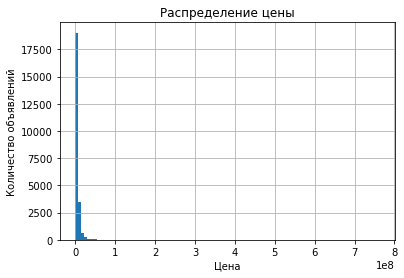

In [46]:
df.hist('last_price', bins=100)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

In [47]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Ценовой разброс слишком велик, чтобы наглядно отразить его на гистограмме.

Средняя цена квартиры составила 6.541.549, медианная - 4.650.000. <a id='min_price'>Минимальная цена</a> 12.190, максимальная - 763.000.000. Видим, что минимальная цена слишком маленькая, скорее всего пользователь указал данные в тысячах, а может быть просто в таблице по ошибке появилось объявление квартиры на сдачу. Взглянем, много ли таких объявлений.

In [48]:
df.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_is_correct,price_square_meter,exposition_year,exposition_month,exposition_week_day,floor_category,living_to_total_ratio,kitchen_to_total_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.00,25,False,...,NaN,8.0,True,112,2019,3,2,последний,0.29,0.37
17456,7,430000,30.4,2019-04-22,1,NaN,2.0,16.00,1,False,...,NaN,NaN,False,14145,2019,4,0,первый,0.53,0.20
14911,5,430000,54.0,2018-06-26,2,NaN,3.0,30.24,3,False,...,NaN,44.0,False,7963,2018,6,1,последний,0.56,NaN
16274,18,440000,40.0,2018-07-10,1,NaN,5.0,22.40,1,False,...,NaN,45.0,False,11000,2018,7,1,первый,0.56,NaN
17676,0,450000,36.5,2018-02-01,1,NaN,5.0,17.30,4,False,...,NaN,120.0,False,12329,2018,2,3,другой,0.47,0.23


Такое объявление одно, поэтому не будем гадать, ошибся ли пользователь и удалим строчку с этим объявлением.

In [49]:
df = df.drop([8793], axis=0).reset_index(drop=True)

In [50]:
df.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_is_correct,price_square_meter,exposition_year,exposition_month,exposition_week_day,floor_category,living_to_total_ratio,kitchen_to_total_ratio
17455,7,430000,30.4,2019-04-22,1,NaN,2.0,16.00,1,False,...,NaN,NaN,False,14145,2019,4,0,первый,0.53,0.20
14910,5,430000,54.0,2018-06-26,2,NaN,3.0,30.24,3,False,...,NaN,44.0,False,7963,2018,6,1,последний,0.56,NaN
16273,18,440000,40.0,2018-07-10,1,NaN,5.0,22.40,1,False,...,NaN,45.0,False,11000,2018,7,1,первый,0.56,NaN
17675,0,450000,36.5,2018-02-01,1,NaN,5.0,17.30,4,False,...,NaN,120.0,False,12329,2018,2,3,другой,0.47,0.23
9580,7,450000,43.4,2018-08-31,2,NaN,5.0,30.30,3,False,...,NaN,96.0,False,10369,2018,8,4,другой,0.70,0.13


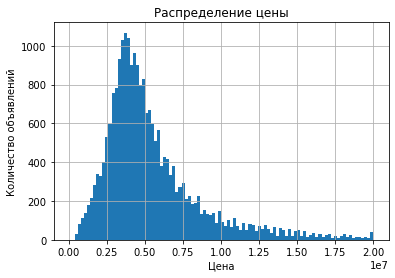

In [51]:
df.hist('last_price', range=(0, 20000000), bins=100)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

Многие квартиры укладываются в цену до 20.000.000.

### Распределение количества комнат

Посмотрим статистику по данным в колонке с количеством комнат.

In [52]:
df['rooms'].describe()

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Количество комнат колеблется от 0 до 19, среднее и медианное значение равно 2.

In [53]:
df.query('rooms == 0')['studio'].mean()

0.700507614213198

Большая часть из квартир с нулевым количеством комнат представлена студиями - 70% от этих квартир. Посмотрим на данные остальных 30% квартир.

In [54]:
df.query('rooms == 0 and studio == False')[['last_price', 'total_area', 'locality_name', 'open_plan']].head()

,last_price,total_area,locality_name,open_plan
349,2320000,25.0,деревня Кудрово,True
508,3375000,34.4,поселок Парголово,True
780,2600000,26.1,поселок Мурино,True
839,1900000,35.0,поселок Новый Свет,True
946,2200000,23.0,поселок Мурино,True


In [55]:
df.query('rooms == 0 and studio == False')['open_plan'].unique()

array([ True])

Квартиры-не студии имеют свободную планировку.

Построим гистограмму распределения количества комнат.

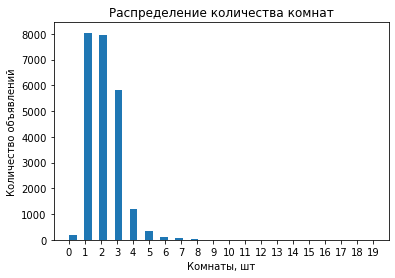

In [56]:
df.hist('rooms', bins=40, grid=False)
plt.title('Распределение количества комнат')
plt.xticks(list(range(20)))
plt.xlabel('Комнаты, шт')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир имеет от 1 до 6 комнат.

### Распределение общей площади.

Построим гистограмму распределения общей площади.

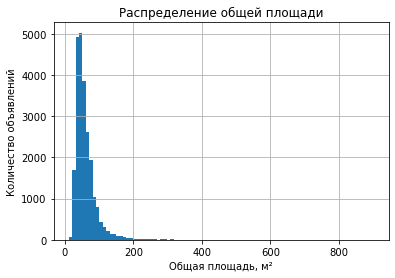

In [57]:
df.hist('total_area', bins=90)
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

Видим, что основная масса объявлений о квартирах с общей площадью до 200 м². 

In [58]:
df['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

Средняя площадь квартир 60 м², медианная - 52 м². К продаже представлены квартиры от 12 до 900 м². 

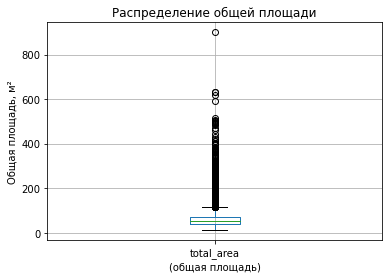

In [59]:
df.boxplot('total_area')
plt.title('Распределение общей площади')
plt.xlabel('(общая площадь)')
plt.ylabel('Общая площадь, м²')
plt.show()

Ящик с усами показал, что продается много квартир с общей площадью выше средней.

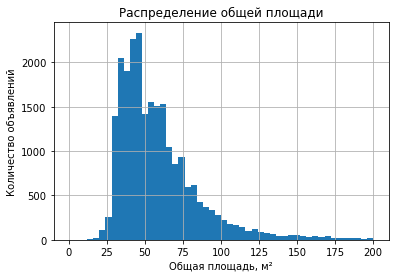

In [60]:
df.hist('total_area', range=(0, 200), bins=50)
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир укладывается по общей площади до 200 м².

### Распределение жилой площади.

Построим гистограмму распределения жилой площади.

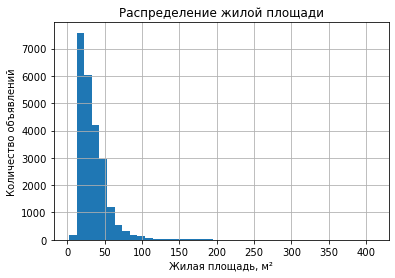

In [61]:
df.hist('living_area', bins=40)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

На гистограммах видно, что большинство квартир укладывается в жилую площадь от 10 до 110 м²

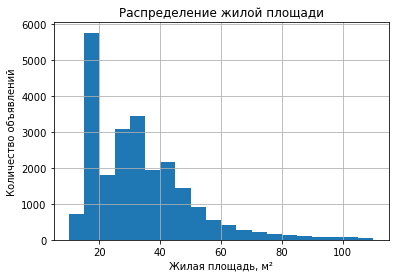

In [62]:
df.hist('living_area', range=(10, 110), bins=20)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

### Распределение площади кухни.

Построим гистограмму распределения площади кухни.

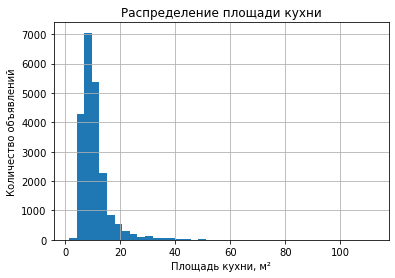

In [63]:
df.hist('kitchen_area', bins=40)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Количество объявлений')
plt.show()

Большинство кухонь меньше 35 м².

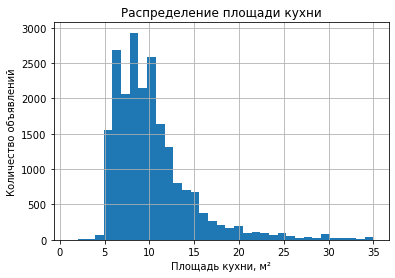

In [64]:
df.hist('kitchen_area', range=(1, 35), bins=35)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Количество объявлений')
plt.show()

### Распределение времени продажи квартиры (размещения объявления от публикации до снятия).

Построим гистограмму распределения времени продажи квартиры.

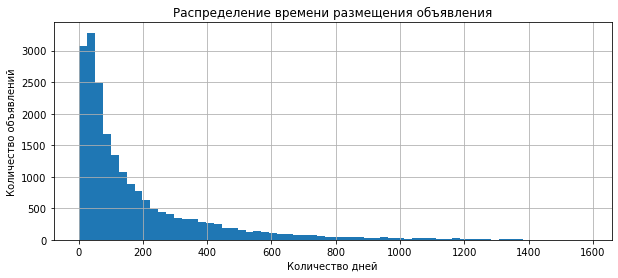

In [65]:
df.hist('days_exposition', bins=64, figsize=(10, 4))
plt.title('Распределение времени размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

По гистограмме видно, что скорость продажи квартиры имеет явно выраженный пик до 100 дней, но потом скорость продажи плавно снижается без явных скачков в значениях. Пока сложно сказать, какое значение будет являться слишком долгим для продажи.

In [66]:
df['days_exposition'].describe()

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Квартиры в среднем продаются за 181 день, медианное значение - 95 дней. 75% квартир было продано не дольше, чем за 232 дня. Скорость продажи квартиры варьируется от 1 до 1580 дней.

Рассмотрим быстрые продажи.

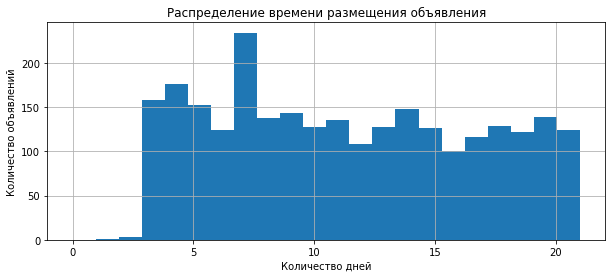

In [67]:
df.hist('days_exposition', bins=22, figsize=(10, 4), range=(0, 21))
plt.title('Распределение времени размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

По гистограмме видно, что очень быстрой можно назвать продажу за 2-3 дня. Попытаемся вычислить очень медленную продажу.

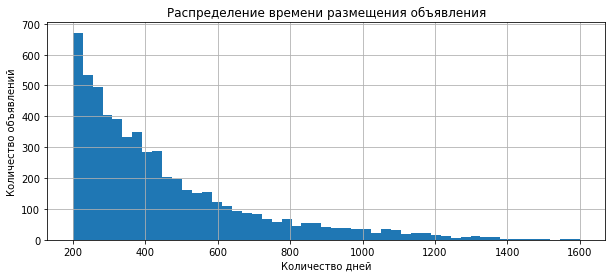

In [68]:
df.hist('days_exposition', bins=51, figsize=(10, 4), range=(200, 1600))
plt.title('Распределение времени размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

График при любых настройках ведет себя достаточно плавно. Поэтому взглянем на ящик с усами.

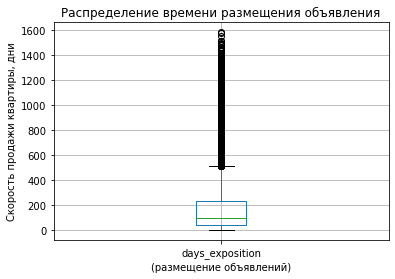

In [69]:
df.boxplot('days_exposition')
plt.title('Распределение времени размещения объявления')
plt.xlabel('(размещение объявлений)')
plt.ylabel('Скорость продажи квартиры, дни')
plt.show()

Гистограмма ведет себя плавно, поэтому ориентируясь на ящик с усами, можно было бы условно считать, что граница между обычной продажей квартиры и медленной находится в районе 500 дней.

Однако при изучении зависимости скорости продажи от года продажи были выяснены интересные значения.

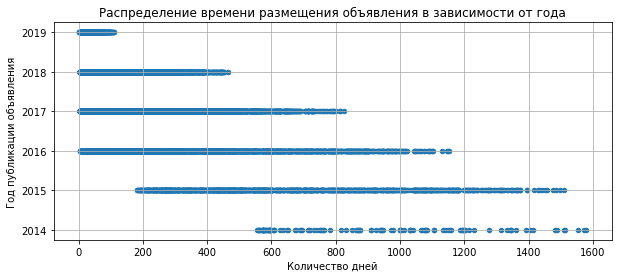

In [70]:
df.plot(x='days_exposition', y ='exposition_year', kind='scatter', grid=True, figsize=(10, 4))
plt.title('Распределение времени размещения объявления в зависимости от года')
plt.xlabel('Количество дней')
plt.ylabel('Год публикации объявления')
plt.show()

Взглянем на полноту данных по 2019 году.

In [71]:
df.query('exposition_year == 2019').pivot_table(index='exposition_month', values='days_exposition', aggfunc=['min', 'max', 'count'])

,min,max,count
,days_exposition,days_exposition,days_exposition
exposition_month,,,
1,3.0,110.0,275
2,3.0,83.0,285
3,3.0,61.0,355
4,2.0,30.0,166
5,1.0,1.0,1


Полноценные данные есть только по первым четырем месяцам.

Для 2014 года характерная скорость продажи квартир от 500 до 1580 дней.
Далее можем видеть, как скорость продажи квартир увеличивалась и к первой половине 2019 года квартиры продавались уже от пары дней до 100 дней c небольшим (есть данные только по первым 4 месяцам). Так что как таковой очень медленной скорости продажи квартир нет, у каждого года своя скорость.

### Редкие и выбивающиеся значения

В таблице нереалистичными значениями были только очень [высокие значения потолка](#ceiling_high) и [очень маленькая цена](#min_price). Реалистичная верхняя граница как для площади жилья, так и для стоимости и многих других параметров практически отсутствует. Можно построить невероятно большой дом и годами пытаться продать его за очень высокую цену. Однако мы должны выяснить, какие параметры больше всего влияют на цену жилья, поэтому стоит искать зависимости для квартир, не критично выбивающихся из средних значений по важным параметрам.

На основе изученных ранее параметров отсечём редкие и выбивающиеся значения:
- Для цены выберем значения до 20.000.000. 
- Общая площадь до 200 м².

In [72]:
df_filtered = df.query('last_price < 20000000 and total_area < 200')

Цена квадратного метра - очень важная величина, для которой мы будем находить корреляцию с другими параметрами. Поэтому также откинем для этой колонки выбивающиеся из нормального распределения значения.

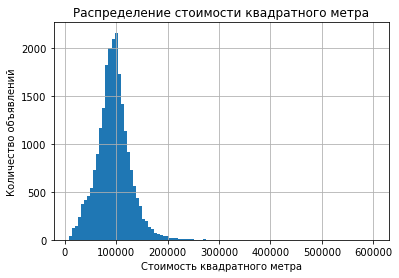

In [73]:
df_filtered.hist('price_square_meter', bins=100)
plt.title('Распределение стоимости квадратного метра')
plt.xlabel('Стоимость квадратного метра')
plt.ylabel('Количество объявлений')
plt.show()

Опираясь на гистограмму, для исследования возьмём жильё стоимостью до 300.000 за м².

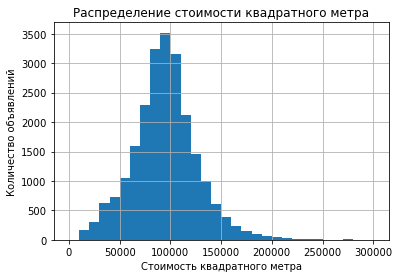

In [74]:
df_filtered.hist('price_square_meter', bins=30, range=(0, 300000))
plt.title('Распределение стоимости квадратного метра')
plt.xlabel('Стоимость квадратного метра')
plt.ylabel('Количество объявлений')
plt.show()

In [75]:
df_filtered = df_filtered.query('price_square_meter < 300000')

Для исследования зависимости цены от высоты потолков будет использоваться срез с меньшим количеством объявлений, так как многие пользователи не указали высоту потолков: `df_filtered.query('ceiling_is_correct')`.

Посмотрим, какие факторы больше всего влияют на стоимость квартиры.

In [76]:
df_filtered.corr()['last_price'].abs().sort_values(ascending=False).head(7)

last_price            1.000000
total_area            0.776684
living_area           0.668028
price_square_meter    0.639572
kitchen_area          0.576179
rooms                 0.503862
ceiling_height        0.431256
Name: last_price, dtype: float64

Оценим корреляцию между ценой квартиры и корректной высотой потолков.

In [77]:
df_filtered.query('ceiling_is_correct').corr()['last_price'].abs().sort_values(ascending=False).loc[['ceiling_height']]

ceiling_height    0.507863
Name: last_price, dtype: float64

Согласно значению корреляции, связь с ценой квартиры имеют следующие значения (по убыванию корреляции):
- общая площадь;
- жилая площадь;
- цена за квадратный метр;
- площадь кухни;
- высота потолка;
- количество комнат.

Значение корреляции для цены и других данных < 0.5 по модулю:
- удалённость от центра по всем квартирам имеет низкую корреляцию с ценой.

Отметим, что на графике заметить взаимосвязь было бы не очень просто.

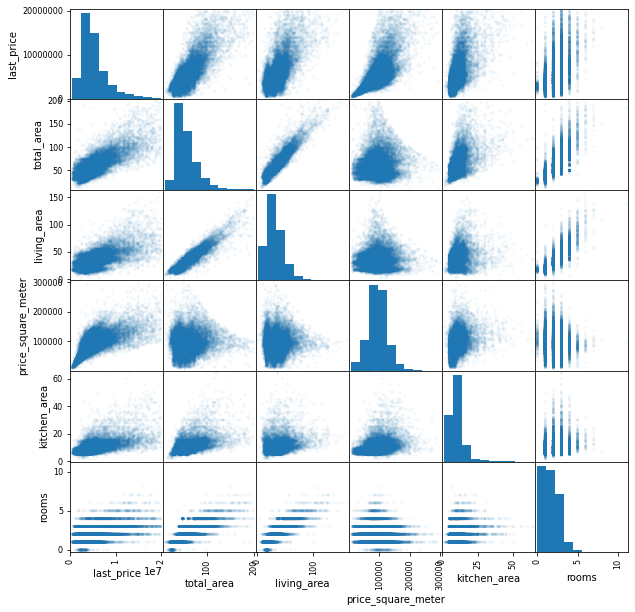

In [78]:
pd.plotting.scatter_matrix(df_filtered[['last_price', 'total_area', 'living_area',  'price_square_meter', 'kitchen_area',  'rooms']],
                           figsize=(10, 10), 
                           alpha=0.05)
plt.show()

### Распределение стоимости квартиры и квадратного метра в зависимости от этажа

Визуально оценим, как отличается цена квартиры и цена за квадратный метр для квартир на разных этажах:

In [79]:
x = df_filtered.groupby('floor_category')

C:\Users\А\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\hist.py:457: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(wspace=0.3, hspace=0.3)


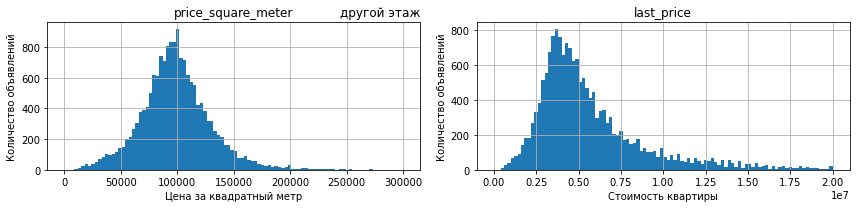

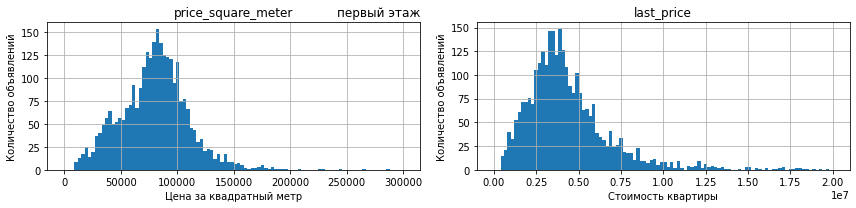

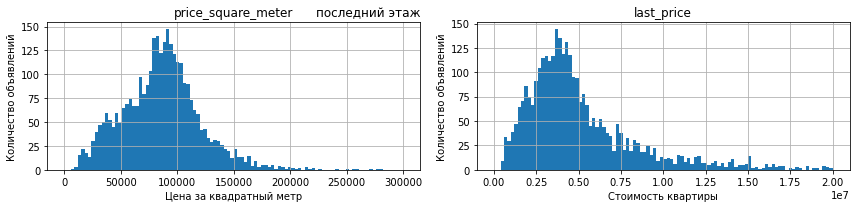

In [80]:
for floor, data in x:
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 3))
    ax = axs[0]
    data[['price_square_meter']].hist(bins=100, range=(0, 300000), ax=ax, grid=True)
    ax.set_xlabel('Цена за квадратный метр')
    ax.set_ylabel('Количество объявлений')
    ax.set_title(floor + ' этаж', loc='right')
    
    ax = axs[1]
    data[['last_price']].hist(bins=100, range=(0, 20000000), ax=ax, grid=True)
    ax.set_xlabel('Стоимость квартиры')
    ax.set_ylabel('Количество объявлений')
    
    plt.tight_layout()
    plt.show()

Видим, что распределение цены за квадратный метр и стоимости квартиры для каждой категории почти одинаковой формы. На первом этаже оно немного смещается влево, к более низким значениям.

Теперь, когда мы убедились в том, что распределения схожи, можем сравнить средние значения для каждой категории - так как мы используем отфильтрованную таблицу, она избавлена от влияния редких и выбивающихся значений.

Сохраним в переменные среднюю цену квартиры и среднюю цену квадратного метра.

In [81]:
mean_price = int(round(df_filtered['last_price'].mean()))
mean_meter = int(round(df_filtered['price_square_meter'].mean()))

Создадим таблицы со средней ценой квартиры и средней ценой за квадратный метр в зависимости от категории этажа.

In [82]:
df_floor = df_filtered.pivot_table(index='floor_category', values='last_price')
df_floor.columns = ['mean_price']

df_floor_meter = df_filtered.pivot_table(index='floor_category', values='price_square_meter')
df_floor_meter.columns = ['mean_meter']

Создадим функцию для отрисовки однотипных графиков.

In [83]:
def show_plot(table, line, rot=0, figsize=(12, 4), title=None, xlabel=None, ylabel=None):
    table.plot(kind='bar', rot=rot, figsize=figsize, title=title).set(xlabel=xlabel, ylabel=ylabel)
    plt.axhline(y=line, color='b', linestyle='-')
    plt.legend('')
    plt.show()

Визуализируем значения средней стоимости квартиры и квадратного метра в зависимости от этажа и сравним со средней стоимостью по всей отфильтрованной таблице (на графике представлена как `синяя линия`).

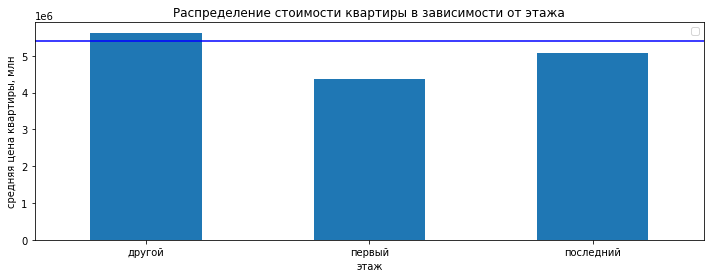

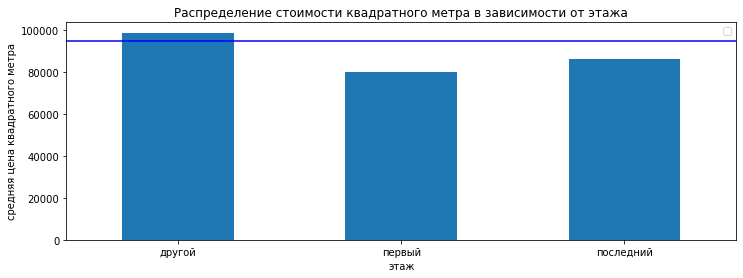

In [84]:
show_plot(df_floor, 
          mean_price, 
          title="Распределение стоимости квартиры в зависимости от этажа", 
          xlabel='этаж', 
          ylabel="средняя цена квартиры, млн")
show_plot(df_floor_meter, 
          mean_meter,
          title='Распределение стоимости квадратного метра в зависимости от этажа',
          xlabel='этаж', 
          ylabel="средняя цена квадратного метра"
         )

Видим, что первый этаж сильнее последнего уступает в цене и для квартиры, и для квадратного метра.

### Распределение стоимости квартиры и квадратного метра в зависимости от года

Создадим таблицу со средней ценой квартиры в зависимости от года.

In [85]:
df_year = df_filtered.pivot_table(index='exposition_year', values='last_price')
df_year.columns = ['mean_price']

Создадим таблицу со средней ценой квадратного метра в зависимости от года.

In [86]:
df_year_meter = df_filtered.pivot_table(index='exposition_year',values='price_square_meter')
df_year_meter.columns = ['mean_meter']

Визуализируем значения средней стоимости квартиры и квадратного метра в зависимости от года и сравним со средней стоимостью по всей отфильтрованной таблице.

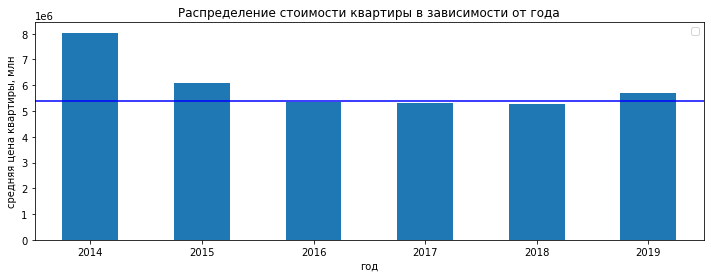

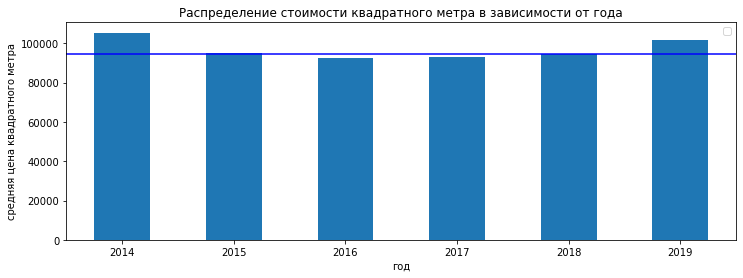

In [87]:
show_plot(df_year, 
          mean_price, 
          title="Распределение стоимости квартиры в зависимости от года", 
          xlabel='год', 
          ylabel="средняя цена квартиры, млн")
show_plot(df_year_meter, 
          mean_meter, 
          title="Распределение стоимости квадратного метра в зависимости от года", 
          xlabel='год',
          ylabel="средняя цена квадратного метра")

Средняя стоимость квадратного метра была максимальной в 2014 и 2019 годах.

Можем отметить, что в 2014 году средняя стоимость квартир была максимальной. Также выше общего среднего значения оказались и средние стоимости квартир в 2015 и 2019 годах. 

### Распределение стоимости квартиры и квадратного метра в зависимости от месяца

Создадим таблицы со средними значениями цены квартиры и квадратного метра в зависимости от месяца

In [88]:
df_month = df_filtered.pivot_table(index='exposition_month', values='last_price')
df_month.columns = ['mean_price']

df_month_meter = df_filtered.pivot_table(index='exposition_month', values='price_square_meter')
df_month_meter.columns = ['mean_meter']

Визуализируем данные

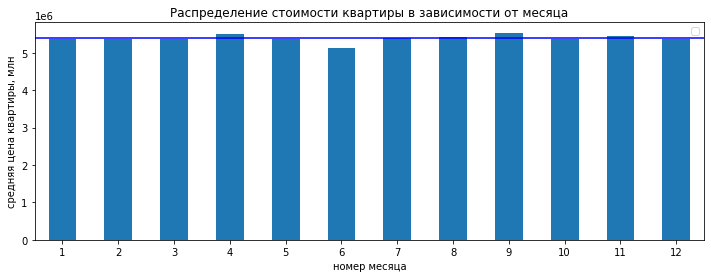

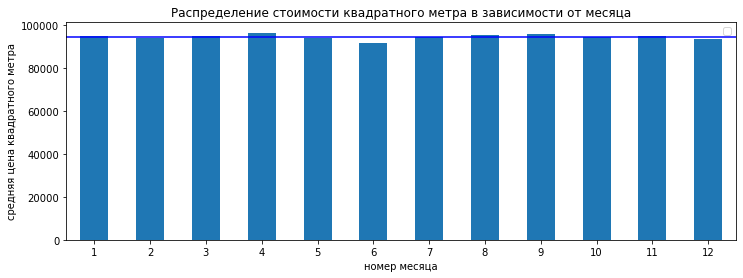

In [89]:
show_plot(df_month, 
          mean_price, 
          title="Распределение стоимости квартиры в зависимости от месяца", 
          xlabel='номер месяца', 
          ylabel="средняя цена квартиры, млн")
show_plot(df_month_meter, 
          mean_meter, 
          title="Распределение стоимости квадратного метра в зависимости от месяца", 
          xlabel='номер месяца',
          ylabel="средняя цена квадратного метра")

Средняя стоимость квадратного метра и продаваемых квартир выше в апреле и сентябре. Самая низкая цена в июне.

### Распределение стоимости квартиры и квадратного метра в зависимости от дня недели

Создадим таблицы со средними значениями цены квартиры и квадратного метра в зависимости от дня недели.

In [90]:
df_week_day = df_filtered.pivot_table(index='exposition_week_day', values='last_price')
df_week_day.columns = ['mean_price']

df_week_day_meter = df_filtered.pivot_table(index='exposition_week_day', values='price_square_meter')
df_week_day_meter.columns = ['mean_meter']

Визуализируем данные.

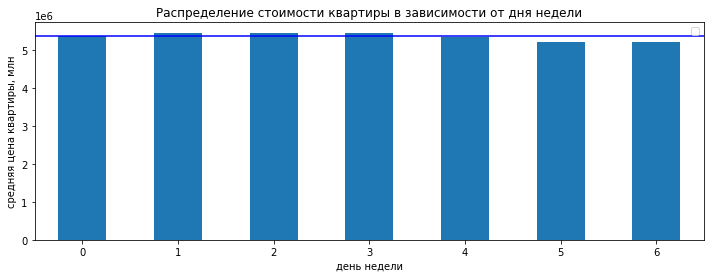

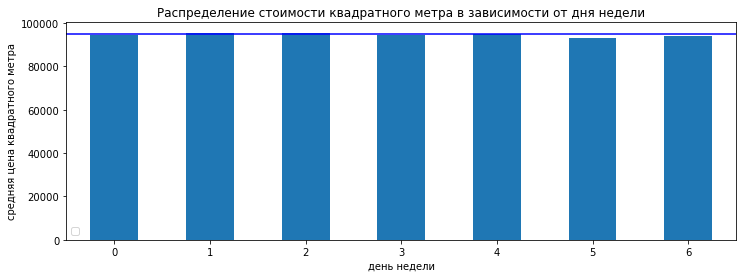

In [91]:
show_plot(df_week_day, 
          mean_price, 
          title="Распределение стоимости квартиры в зависимости от дня недели", 
          xlabel='день недели', 
          ylabel="средняя цена квартиры, млн")
show_plot(df_week_day_meter, 
          mean_meter, 
          title="Распределение стоимости квадратного метра в зависимости от дня недели", 
          xlabel='день недели',
          ylabel="средняя цена квадратного метра")

К выходным средняя цена как на квартиру, так и на квадратный метр снижается.

**Вывод**

Стоимость квартиры выше всего для квартир, относящихся к следующим категориям:
- не на первом и не на последнем этаже
- выставлены на продажу в 2014, 2015 или 2019 году. (Для квадратного метра только 2014 и 2019 годы)
- выставлены на продажу в апреле или сентябре
- выставлены на продажу в будни

Стоимость квартиры ниже всего для квартир, относящихся к следующим категориям:
- на первом этаже
- выставлены на продажу в 2017 или 2018 году (для квадратного метра в 2016 или 2017 году)
- выставлены на продажу в июне
- выставлены на продажу в выходные

### Населенные пункты с наибольшим числом объявлений

Выясним, для каких населенных пунктов предоставлено больше всего объявлений.

In [92]:
locality_max = df_filtered.pivot_table(index='locality_name', values=['last_price', 'price_square_meter'], aggfunc=['count', 'mean'])
locality_max.columns = ['count', 'count1', 'mean_last_price', 'mean_price_square_meter']
locality_max = locality_max.drop(columns=['count1']).sort_values(by='count', ascending=False).head(10)
locality_max

,count,mean_last_price,mean_price_square_meter
locality_name,,,
Санкт-Петербург,14973,6.405076e+06,108533.484873
поселок Мурино,556,3.652361e+06,85681.758993
деревня Кудрово,472,4.358688e+06,95324.957627
поселок Шушары,440,4.108082e+06,78677.379545
Всеволожск,397,3.737119e+06,67214.254408
Пушкин,359,5.872861e+06,101867.481894
Колпино,337,3.866289e+06,75333.287834
поселок Парголово,326,4.477609e+06,90332.236196
Гатчина,307,3.488337e+06,68746.110749


Выяснили, что в Санкт-Петербурге больше всего объявлений: почти 15 тысяч. В остальных населенных пунктах объявлений от 556 до 237.

Теперь, когда мы узнали, что на средние значения очень влияли столичные цены, посчитаем средние значения для средних значений, чтобы посмотреть, насколько квартиры в столице дороже.

In [93]:
mean_mean_price = locality_max['mean_last_price'].mean()
mean_mean_meter = locality_max['mean_price_square_meter'].mean()
mean_mean_price, mean_mean_meter

(4321740.356473915, 82985.28719509169)

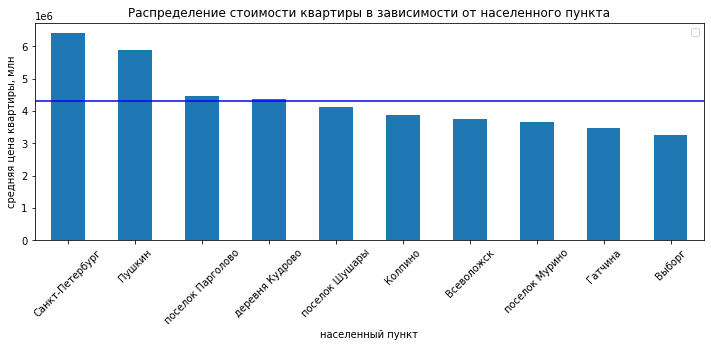

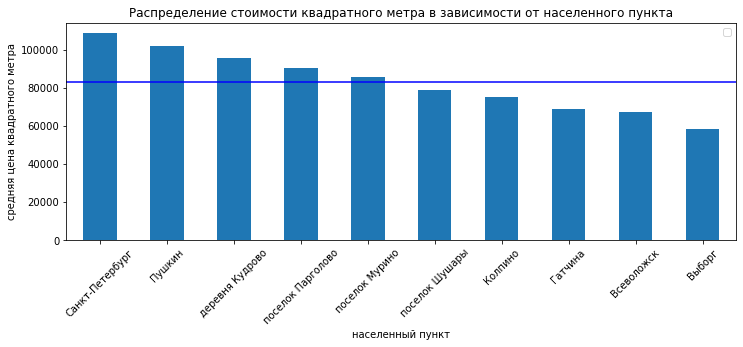

In [94]:
show_plot(locality_max['mean_last_price'].sort_values(ascending=False), 
          mean_mean_price, 
          rot=45,
          title="Распределение стоимости квартиры в зависимости от населенного пункта", 
          xlabel='населенный пункт', 
          ylabel="средняя цена квартиры, млн")
show_plot(locality_max['mean_price_square_meter'].sort_values(ascending=False), 
          mean_mean_meter, 
          rot=45,
          title="Распределение стоимости квадратного метра в зависимости от населенного пункта", 
          xlabel='населенный пункт',
          ylabel="средняя цена квадратного метра")

**Вывод**

Самые **дорогие квартиры** в следующих населенных пунктах:
- Санкт-Петербург;
- Пушкин;
- поселок Парголово. 

Стоимость за квадратный метр выше средней также в деревне Кудрово и поселке Мурино.

Самые **дешевые квартиры** в следующих населенных пунктах:
- Выборг;
- Гатчина;
- поселок Мурино;
- Всеволожск;
- Колпино. 

Самая дешевая цена за квадратный метр в Выборге, Всеволожске, Гатчине и Колпино.

### Квартиры в центре Санкт-Петербурга

Так как в северной столице больше всего предложений о продаже квартиры, стоит изучить эти данные отдельно.

Важно узнать, какие квартиры входят в центр города и какие параметры для них больше влияют на цену. 

Создадим колонку с расстоянием до центра в километрах.

In [95]:
df_filtered = df_filtered.dropna(subset=['city_centers_nearest'])

df_filtered['city_centers_km'] = df_filtered['city_centers_nearest'] / 1000
df_filtered['city_centers_km'] = df_filtered['city_centers_km'].apply(round).astype('int8')

<ipython-input-95-2345727690f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['city_centers_km'] = df_filtered['city_centers_nearest'] / 1000
<ipython-input-95-2345727690f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['city_centers_km'] = df_filtered['city_centers_km'].apply(round).astype('int8')


Посмотрим на распределение питерских квартир в зависимости от расстояния от центра.

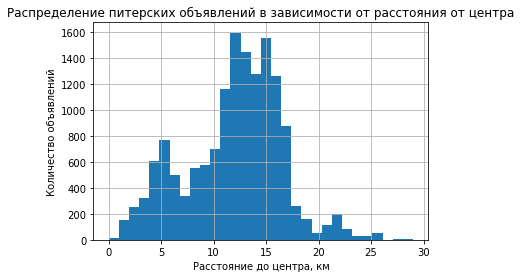

In [96]:
df_filtered.query('locality_name == "Санкт-Петербург"')['city_centers_km'].hist(bins=30)
plt.title('Распределение питерских объявлений в зависимости от расстояния от центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Количество объявлений')
plt.show()

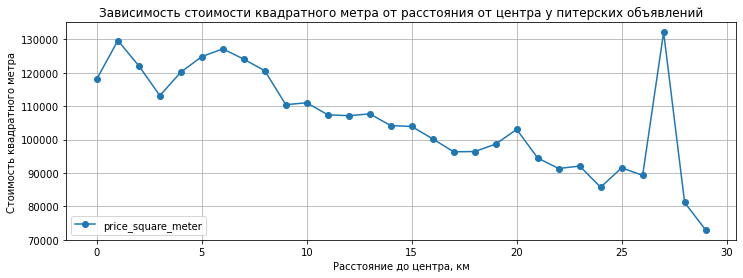

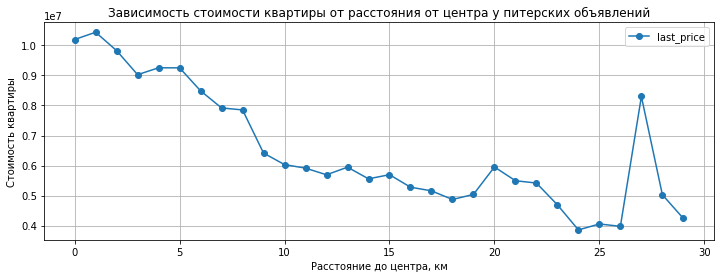

In [97]:
df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='price_square_meter').plot(figsize=(12, 4), style='-o')
plt.grid()
plt.title('Зависимость стоимости квадратного метра от расстояния от центра у питерских объявлений')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость квадратного метра')
plt.show()

df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='last_price').plot(figsize=(12, 4), style='-o')
plt.grid()
plt.title('Зависимость стоимости квартиры от расстояния от центра у питерских объявлений')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость квартиры')
plt.show()

Судя по графикам, будем считать, что граница центра Санкт-Петербурга считается с 8 км от центра (включительно).

In [98]:
center = df_filtered.query('locality_name == "Санкт-Петербург" and city_centers_km < 9')
center.shape

(3501, 31)

Всего в объявлениях представлено 3501 квартира.

Сравним распределение общей площади продаваемых квартир во всем городе и в центре.

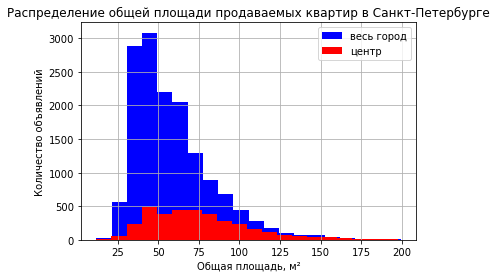

In [99]:
df_filtered.query('locality_name == "Санкт-Петербург"')['total_area'].hist(bins=20, color='blue')
center['total_area'].hist(bins=20, color='red')
plt.legend(['весь город', 'центр'])
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество объявлений')
plt.title('Распределение общей площади продаваемых квартир в Санкт-Петербурге')
plt.show()

- В центре меньше квартир, и распределение более плавное, без ярко выраженных пиков на 30-50 м², доля квартир с большей площадью выше.

Сравним распределение цены продаваемых квартир во всем городе и в центре.

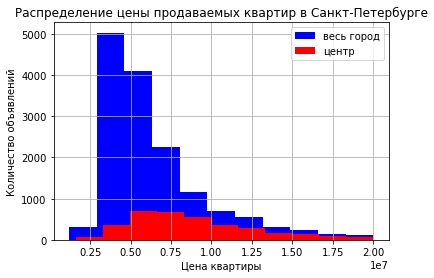

In [100]:
df_filtered.query('locality_name == "Санкт-Петербург"')['last_price'].hist(bins=11, color='blue')
center['last_price'].hist(bins=11, color='red')
plt.legend(['весь город', 'центр'])
plt.xlabel('Цена квартиры')
plt.ylabel('Количество объявлений')
plt.title('Распределение цены продаваемых квартир в Санкт-Петербурге')
plt.show()

- В центре распределение более плавное, без ярко выраженных пиков в цене в районе 5 - 7 млн, доля квартир с большей ценой выше.

Сравним распределение количеста комнат продаваемых квартир во всем городе и в центре.

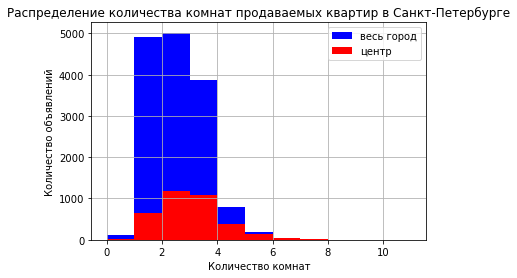

In [101]:
df_filtered.query('locality_name == "Санкт-Петербург"')['rooms'].hist(bins=11, color='blue')
center['rooms'].hist(bins=11, color='red')
plt.legend(['весь город', 'центр'])
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества комнат продаваемых квартир в Санкт-Петербурге')
plt.show()

- Распределение комнат одинаково и максимальное количество у квартир с 1 - 3 комнатами.

Сравним распределение высоты потолка продаваемых квартир во всем городе и в центре.

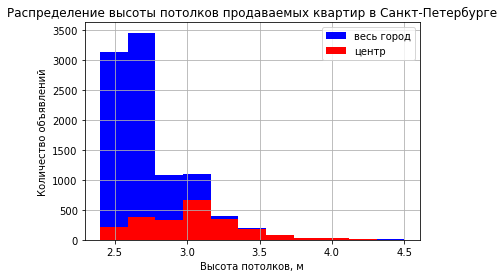

In [102]:
df_filtered.query('locality_name == "Санкт-Петербург" and ceiling_is_correct == True')['ceiling_height'].hist(bins=11, color='blue')
center.query('ceiling_is_correct == True')['ceiling_height'].hist(bins=11, color='red')
plt.legend(['весь город', 'центр'])
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.title('Распределение высоты потолков продаваемых квартир в Санкт-Петербурге')
plt.show()

- Пик распределения высоты потолков в центре выше, чем во всем городе примерно на полметра.

**Вывод**

В центре Санкт-Петербурга:
- Больше квартир с большей площадью.
- Больше квартир по большей цене.
- Выше потолки.

Оценим корреляцию между ценой квартиры в центре и остальными параметрами.

In [103]:
center.corr()['last_price'].abs().sort_values(ascending=False).head(7)

last_price            1.000000
total_area            0.745995
living_area           0.637140
kitchen_area          0.508308
rooms                 0.505474
price_square_meter    0.386806
ceiling_height        0.298243
Name: last_price, dtype: float64

А так же взглянем на корреляцию между корректными значениями потолка и ценой квартиры.

In [104]:
center.query('ceiling_is_correct').corr()['last_price'].abs().sort_values(ascending=False).loc[['ceiling_height']]

ceiling_height    0.310386
Name: last_price, dtype: float64

Стоимость квартиры в центре Санкт-Петербурга зависят от следующих параметров (по убыванию зависимости):
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат

Высота потолка не имеет решающего значения.

Сравним с корреляцией по всему Санкт-Петербургу.

In [105]:
df_filtered.query('locality_name == "Санкт-Петербург"').corr()['last_price'].abs().sort_values(ascending=False).head(7)

last_price            1.000000
total_area            0.828642
living_area           0.716421
kitchen_area          0.605760
rooms                 0.552134
price_square_meter    0.508154
ceiling_height        0.428996
Name: last_price, dtype: float64

In [106]:
df_filtered.query('locality_name == "Санкт-Петербург"').corr()['last_price'].abs().sort_values(ascending=False).loc[['ceiling_height']]

ceiling_height    0.428996
Name: last_price, dtype: float64

- Стоимость квартиры во всем Санкт-Петербурге зависит от тех же параметров, что и в центре, однако тут цена за квадратный метр так же является важной.

Посчитаем средние значения для квартир в центре и во всем городе.

In [107]:
mean_center = round(center['last_price'].mean())
mean_center_meter = round(center['price_square_meter'].mean())

mean_spb = round(df_filtered.query('locality_name == "Санкт-Петербург"')['last_price'].mean())
mean_spb_meter = round(df_filtered.query('locality_name == "Санкт-Петербург"')['price_square_meter'].mean())

In [108]:
print('Среднее значение цены квартиры в центре Санкт-Петербурга: ', mean_center)
print('Среднее значение цены квартиры во всем Санкт-Петербурге: ', mean_spb)
print()
print('Среднее значение квадратного метра в центре Санкт-Петербурга: ', mean_center_meter)
print('Среднее значение квадратного метра во всем Санкт-Петербурге: ', mean_spb_meter)

Среднее значение цены квартиры в центре Санкт-Петербурга:  8870929
Среднее значение цены квартиры во всем Санкт-Петербурге:  6401369

Среднее значение квадратного метра в центре Санкт-Петербурга:  122520
Среднее значение квадратного метра во всем Санкт-Петербурге:  108484


Визуализируем распределение стоимости квартиры и квадратного метра в зависимости от этажа для центра и всего Санкт-Петербурга.

In [109]:
center_floor = center.pivot_table(index='floor_category', values='last_price')
center_floor.columns = ['mean_price']

center_floor_meter = center.pivot_table(index='floor_category', values='price_square_meter')
center_floor_meter.columns = ['mean_meter']

spb_floor = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='floor_category', values='last_price')
spb_floor.columns = ['mean_price']

spb_floor_meter = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='floor_category', values='price_square_meter')
spb_floor_meter.columns = ['mean_meter']

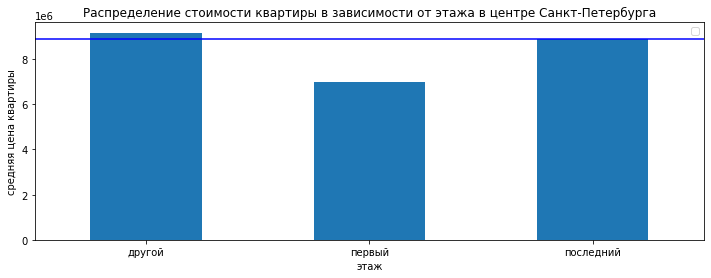

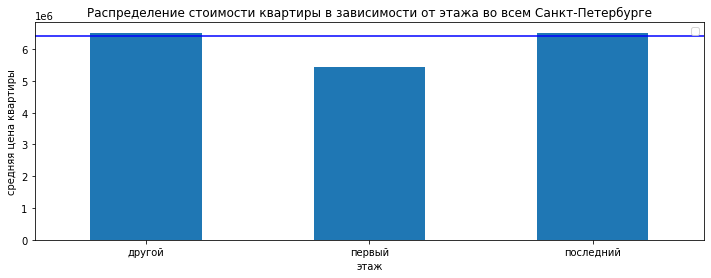

In [110]:
show_plot(center_floor, 
          mean_center, 
          title="Распределение стоимости квартиры в зависимости от этажа в центре Санкт-Петербурга", 
          xlabel='этаж', 
          ylabel="средняя цена квартиры")
show_plot(spb_floor, 
          mean_spb, 
          title="Распределение стоимости квартиры в зависимости от этажа во всем Санкт-Петербурге", 
          xlabel='этаж',
          ylabel="средняя цена квартиры")

`Синей линией` показаны средние значения цены для центра и всего города соответственно.

- Соотношения для центра и остальной части Санкт-Петербурга практически сохраняются. 
- Самые дешевые квартиры на первом этаже. 
- В центре цена квартир на последнем этаже равна средней по всем этажам, а во всём Санкт-Петербурге они стоят на уровне с квартирами на других этажах.

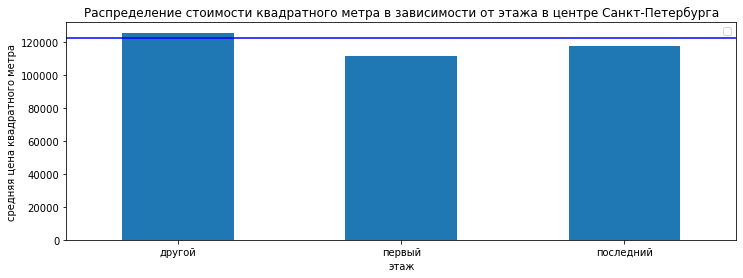

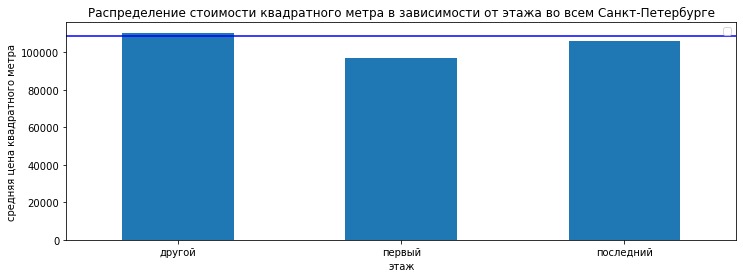

In [111]:
show_plot(center_floor_meter, 
          mean_center_meter, 
          title="Распределение стоимости квадратного метра в зависимости от этажа в центре Санкт-Петербурга", 
          xlabel='этаж', 
          ylabel="средняя цена квадратного метра")
show_plot(spb_floor_meter, 
          mean_spb_meter, 
          title="Распределение стоимости квадратного метра в зависимости от этажа во всем Санкт-Петербурге", 
          xlabel='этаж',
          ylabel="средняя цена квадратного метра")

- Первый этаж занижает стоимость квадратного метра и в центре, и во всем городе. 
- Последний этаж так же чуть ниже по цене, чем остальные этажи.

Визуализируем распределение стоимости квартиры и квадратного метра в зависимости от количества комнат для центра и всего Санкт-Петербурга.

In [112]:
center_rooms = center.pivot_table(index='rooms', values='last_price')
center_rooms.columns = ['mean_price']

center_rooms_meter = center.pivot_table(index='rooms', values='price_square_meter')
center_rooms_meter.columns = ['mean_meter']

spb_rooms = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='rooms', values='last_price')
spb_rooms.columns = ['mean_price']

spb_rooms_meter = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='rooms', values='price_square_meter')
spb_rooms_meter.columns = ['mean_meter']

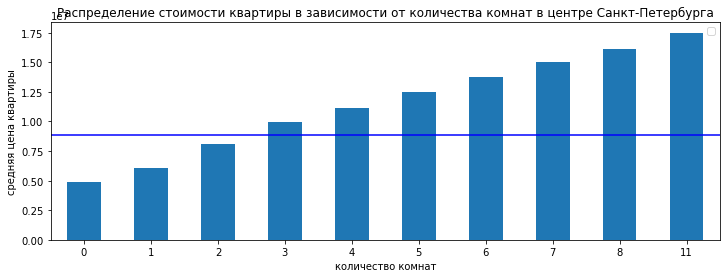

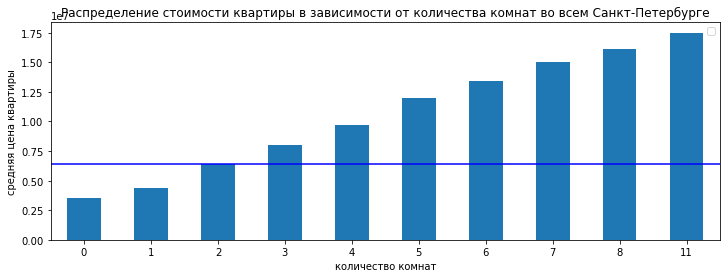

In [113]:
show_plot(center_rooms, 
          mean_center, 
          title="Распределение стоимости квартиры в зависимости от количества комнат в центре Санкт-Петербурга", 
          xlabel='количество комнат', 
          ylabel="средняя цена квартиры")
show_plot(spb_rooms, 
          mean_spb, 
          title="Распределение стоимости квартиры в зависимости от количества комнат во всем Санкт-Петербурге", 
          xlabel='количество комнат',
          ylabel="средняя цена квартиры")

- Как для центра, так и для всего города справедлива зависимоть - чем больше комнат, тем выше цена квартиры. 
- Для центра квартиры с количеством комнат до двух (включительно) ниже средней цены по центру. 
- Для города ниже средней цены только одно- и безкомнатные квартиры.

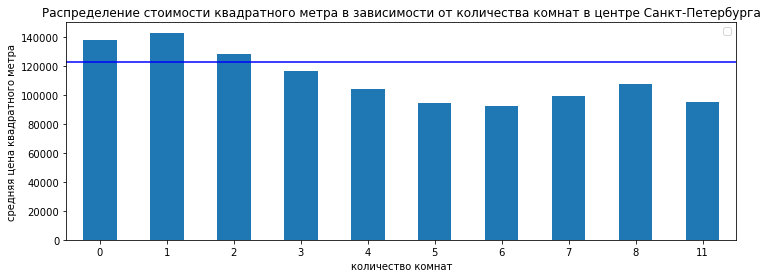

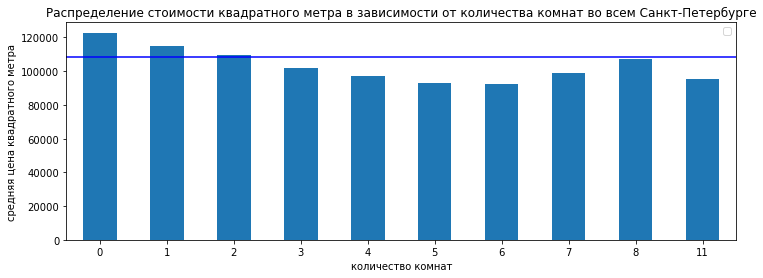

In [114]:
show_plot(center_rooms_meter, 
          mean_center_meter, 
          title="Распределение стоимости квадратного метра в зависимости от количества комнат в центре Санкт-Петербурга", 
          xlabel='количество комнат', 
          ylabel="средняя цена квадратного метра")
show_plot(spb_rooms_meter, 
          mean_spb_meter, 
          title="Распределение стоимости квадратного метра в зависимости от количества комнат во всем Санкт-Петербурге", 
          xlabel='количество комнат',
          ylabel="средняя цена квадратного метра")

- Для центра 0-, 1-, и 2-комнатные квартиры стоимость квадратного метра выше средней.
- Для всего города стоимость выше средней только у 0- и 1-комнатных квартир.

Визуализируем распределение стоимости квартиры и квадратного метра в зависимости от расстояния от центра для самого центра и всего Санкт-Петербурга.

In [115]:
center_km = center.pivot_table(index='city_centers_km', values='last_price')
center_km.columns = ['mean_price']

center_km_meter = center.pivot_table(index='city_centers_km', values='price_square_meter')
center_km_meter.columns = ['mean_meter']

spb_km = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='last_price')
spb_km.columns = ['mean_price']

spb_km_meter = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='price_square_meter')
spb_km_meter.columns = ['mean_meter']

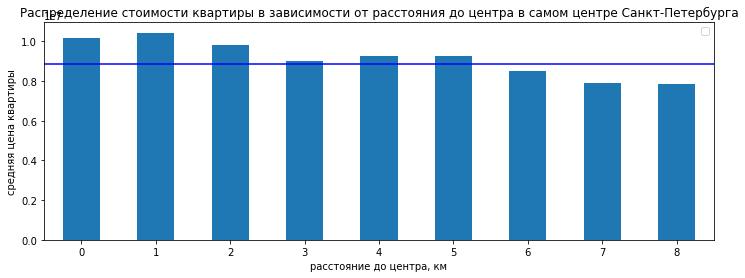

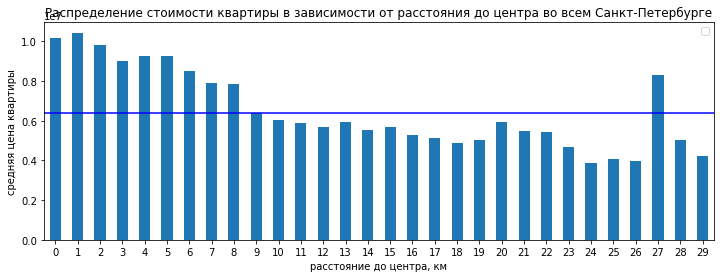

In [116]:
show_plot(center_km, 
          mean_center, 
          title="Распределение стоимости квартиры в зависимости от расстояния до центра в самом центре Санкт-Петербурга", 
          xlabel='расстояние до центра, км', 
          ylabel="средняя цена квартиры")
show_plot(spb_km, 
          mean_spb, 
          title="Распределение стоимости квартиры в зависимости от расстояния до центра во всем Санкт-Петербурге", 
          xlabel='расстояние до центра, км',
          ylabel="средняя цена квартиры")

Выясним, почему на 27 км от центра пик средней цены.

In [117]:
df_filtered.query('locality_name == "Санкт-Петербург" and city_centers_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_is_correct,price_square_meter,exposition_year,exposition_month,exposition_week_day,floor_category,living_to_total_ratio,kitchen_to_total_ratio,city_centers_km
748,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,128.0,True,193919,2017,11,1,другой,0.41,0.34,27
5961,6,2250000,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,178.0,False,70312,2018,2,1,последний,0.52,0.22,27


- В центре самые дорогие по стоимости квартиры на расстоянии первых пяти км от центра.
- Во всем городе выше средней стоимости только стоимость квартир в центре и на 27 км, потому что одна из двух продающихся там квартир очень дорогая (ее цена 14.350.000).

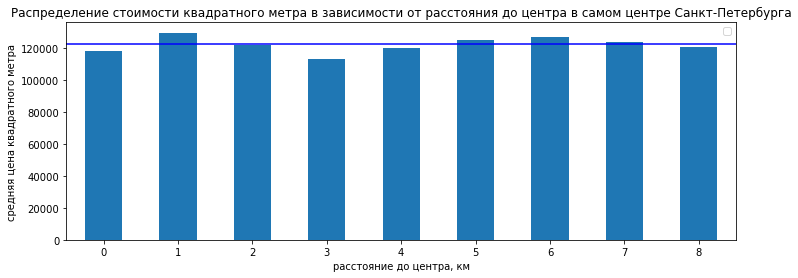

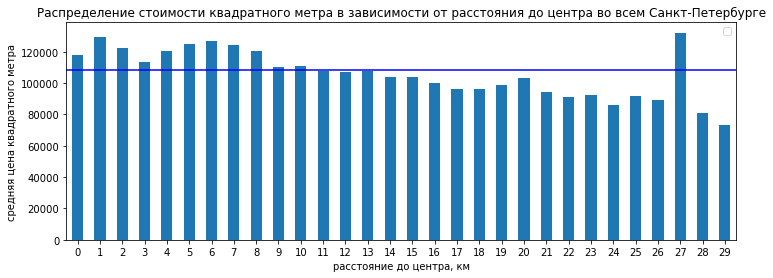

In [118]:
show_plot(center_km_meter, 
          mean_center_meter, 
          title="Распределение стоимости квадратного метра в зависимости от расстояния до центра в самом центре Санкт-Петербурга", 
          xlabel='расстояние до центра, км', 
          ylabel="средняя цена квадратного метра")
show_plot(spb_km_meter, 
          mean_spb_meter, 
          title="Распределение стоимости квадратного метра в зависимости от расстояния до центра во всем Санкт-Петербурге", 
          xlabel='расстояние до центра, км',
          ylabel="средняя цена квадратного метра")

- Стоимость квадратного метра в центре распределена достаточно равномерно.
- Во всем городе также стоимость квадратного метра выше в центре города и в пиковом значении на 27 км от центра.

Визуализируем распределение стоимости квартиры и квадратного метра в зависимости от года публикации объявления для центра и всего Санкт-Петербурга.

In [119]:
center_year = center.pivot_table(index='exposition_year', values='last_price')
center_year.columns = ['mean_price']

center_year_meter = center.pivot_table(index='exposition_year', values='price_square_meter')
center_year_meter.columns = ['mean_meter']

spb_year = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='exposition_year', values='last_price')
spb_year.columns = ['mean_price']

spb_year_meter = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='exposition_year', values='price_square_meter')
spb_year_meter.columns = ['mean_meter']

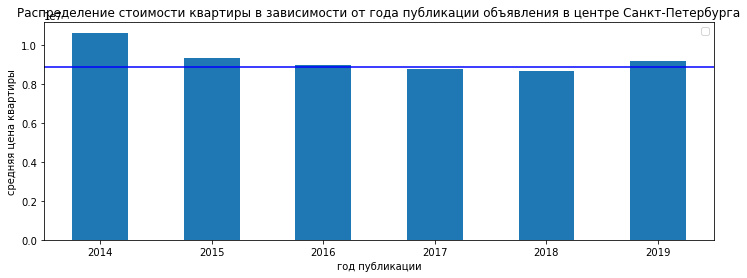

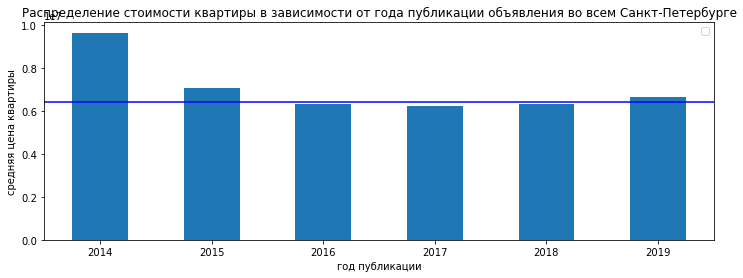

In [120]:
show_plot(center_year, 
          mean_center, 
          title="Распределение стоимости квартиры в зависимости от года публикации объявления в центре Санкт-Петербурга", 
          xlabel='год публикации', 
          ylabel="средняя цена квартиры")
show_plot(spb_year, 
          mean_spb, 
          title="Распределение стоимости квартиры в зависимости от года публикации объявления во всем Санкт-Петербурге", 
          xlabel='год публикации',
          ylabel="средняя цена квартиры")

- Распределение во всем Санкт-Петербурге и в центре практически одинаково. Квартиры выше средней стоимости были в 2014, 2015 и 2019 году.

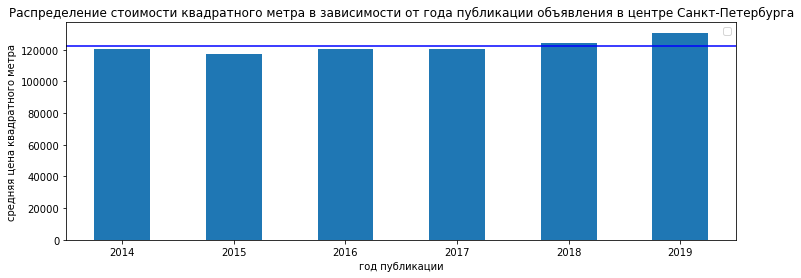

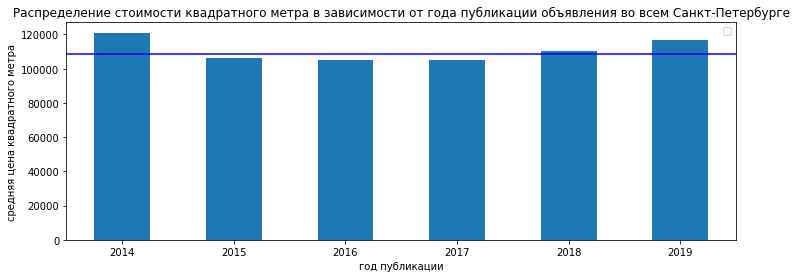

In [121]:
show_plot(center_year_meter, 
          mean_center_meter, 
          title="Распределение стоимости квадратного метра в зависимости от года публикации объявления в центре Санкт-Петербурга", 
          xlabel='год публикации', 
          ylabel="средняя цена квадратного метра")
show_plot(spb_year_meter, 
          mean_spb_meter, 
          title="Распределение стоимости квадратного метра в зависимости от года публикации объявления во всем Санкт-Петербурге", 
          xlabel='год публикации',
          ylabel="средняя цена квадратного метра")

- Стоимость квадратного метра в центре была выше средней толькко в 2019 году - выходит, что в 2014 году продавались большие по площади квартиры. 
- Для всего города максимальная стоимость квадратного метра была в 2014 и 2019 годах.

Визуализируем распределение стоимости квартиры и квадратного метра в зависимости от месяца публикации объявления для центра и всего Санкт-Петербурга.

In [122]:
center_month = center.pivot_table(index='exposition_month', values='last_price')
center_month.columns = ['mean_price']

center_month_meter = center.pivot_table(index='exposition_month', values='price_square_meter')
center_month_meter.columns = ['mean_meter']

spb_month = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='exposition_month', values='last_price')
spb_month.columns = ['mean_price']

spb_month_meter = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='exposition_month', values='price_square_meter')
spb_month_meter.columns = ['mean_meter']

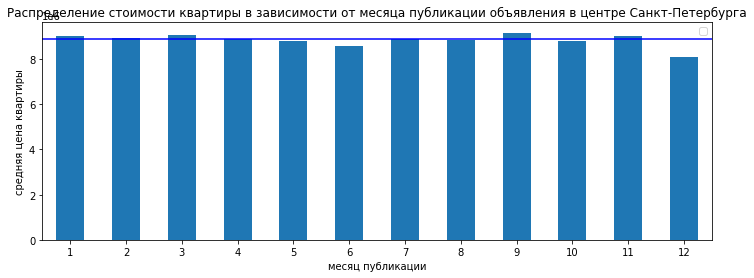

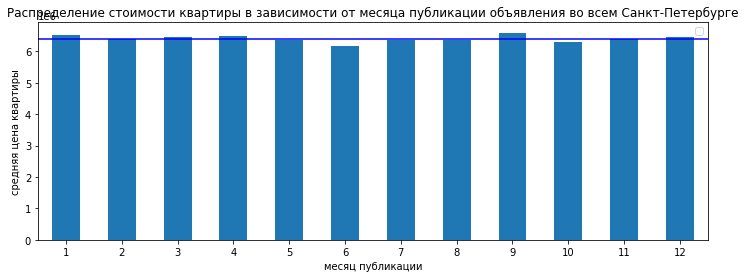

In [123]:
show_plot(center_month, 
          mean_center, 
          title="Распределение стоимости квартиры в зависимости от месяца публикации объявления в центре Санкт-Петербурга", 
          xlabel='месяц публикации', 
          ylabel="средняя цена квартиры")
show_plot(spb_month, 
          mean_spb, 
          title="Распределение стоимости квартиры в зависимости от месяца публикации объявления во всем Санкт-Петербурге", 
          xlabel='месяц публикации',
          ylabel="средняя цена квартиры")

- В центре самая высокая стоимость жилья в сентябре и марте, самая низкая - в декабре.
- Во всем городе самая высокая стоимость жилья тоже в сентябре, однако самая низкая - в июне.

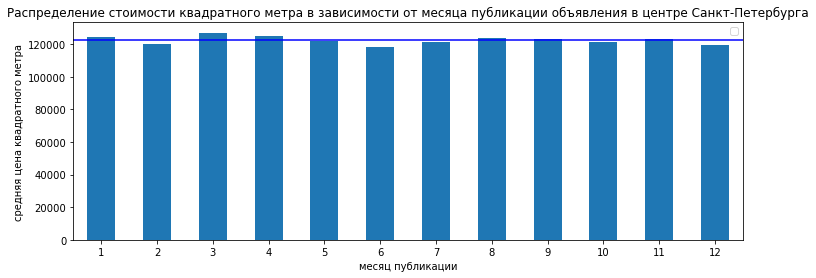

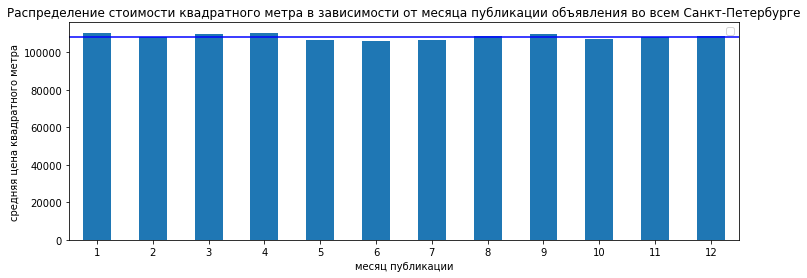

In [124]:
show_plot(center_month_meter, 
          mean_center_meter, 
          title="Распределение стоимости квадратного метра в зависимости от месяца публикации объявления в центре Санкт-Петербурга", 
          xlabel='месяц публикации', 
          ylabel="средняя цена квадратного метра")
show_plot(spb_month_meter, 
          mean_spb_meter, 
          title="Распределение стоимости квадратного метра в зависимости от месяца публикации объявления во всем Санкт-Петербурге", 
          xlabel='месяц публикации',
          ylabel="средняя цена квадратного метра")

- В центре самая высокая цена на квадратный метр в марте, и самая низкая в июне, декабре и феврале.
- Во всем городе цена достаточно однородна, наблюдается увеличение цены в январе.

Визуализируем распределение стоимости квартиры и квадратного метра в зависимости от дня недели публикации объявления для центра и всего Санкт-Петербурга.

In [125]:
center_day = center.pivot_table(index='exposition_week_day', values='last_price')
center_day.columns = ['mean_price']

center_day_meter = center.pivot_table(index='exposition_week_day', values='price_square_meter')
center_day_meter.columns = ['mean_meter']

spb_day = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='exposition_week_day', values='last_price')
spb_day.columns = ['mean_price']

spb_day_meter = df_filtered.query('locality_name == "Санкт-Петербург"').pivot_table(index='exposition_week_day', values='price_square_meter')
spb_day_meter.columns = ['mean_meter']

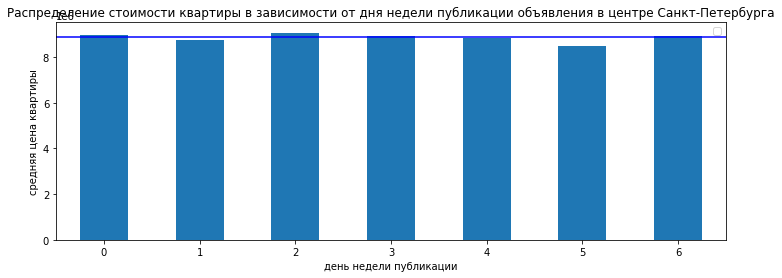

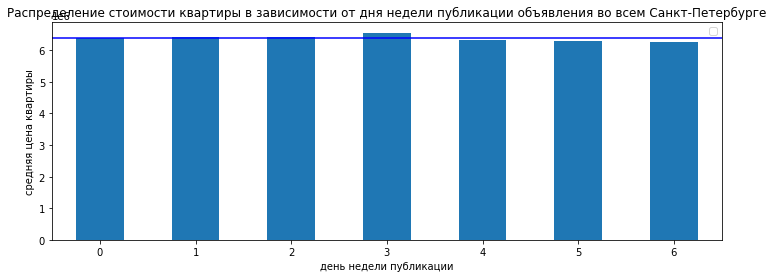

In [126]:
show_plot(center_day, 
          mean_center, 
          title="Распределение стоимости квартиры в зависимости от дня недели публикации объявления в центре Санкт-Петербурга", 
          xlabel='день недели публикации', 
          ylabel="средняя цена квартиры")
show_plot(spb_day, 
          mean_spb, 
          title="Распределение стоимости квартиры в зависимости от дня недели публикации объявления во всем Санкт-Петербурге", 
          xlabel='день недели публикации',
          ylabel="средняя цена квартиры")

- В центре стоимость квартир выше среднего по средам, и ниже по вторникам.
- Во всем городе - выше по четвергам и ниже с пятницы по воскресенье.

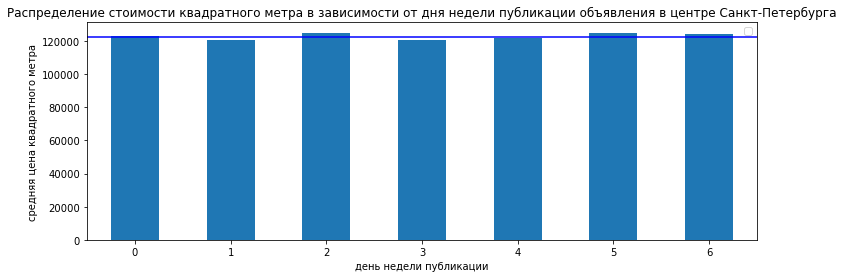

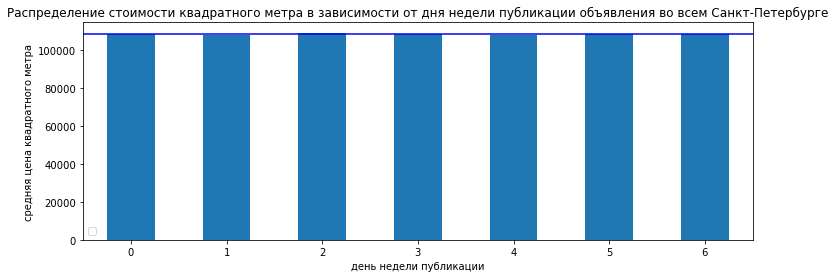

In [127]:
show_plot(center_day_meter, 
          mean_center_meter, 
          title="Распределение стоимости квадратного метра в зависимости от дня недели публикации объявления в центре Санкт-Петербурга", 
          xlabel='день недели публикации', 
          ylabel="средняя цена квадратного метра")
show_plot(spb_day_meter, 
          mean_spb_meter, 
          title="Распределение стоимости квадратного метра в зависимости от дня недели публикации объявления во всем Санкт-Петербурге", 
          xlabel='день недели публикации',
          ylabel="средняя цена квадратного метра")

- Стоимость квадратного метра в центре чуть выше в среду и по выходным.
- Во всем городе стоимость квадратного метра практически однородна вне зависимости от дня недели, наблюдается небольшое увеличение цены в среду.

## Общий вывод

В данном исследовании на основании архива объявлений о продаже квартир в Санкт-Петербурге и соседних неселенных пунктах за несколько лет **были выявлены факторы, влияющие больше всего на стоимость квартир**.

**Большинство изученных квартир**:
- укладываются в цену до 20.000.000
- имеют от 1 до 6 комнат
- имеют общую площадь до 200 м²
- имеют высоту потолков от 2.4 до 4.5 м
Очень быстрые продажи составили 2-3 дня. 

Согласно исследованию, **на цену квартиры влияют** следующие факторы (по убыванию влияния):
- общая площадь;
- жилая площадь;
- цена за квадратный метр;
- площадь кухни;
- высота потолка;
- количество комнат.

Для всей выборки **квартиры на первом этаже в среднем дешевле** как по стоимости, так и по цене за квадратный метр, чем квартиры на последнем этаже, а те, в свою очередь, дешевле, чем квартиры на других этажах.

Стоимость квартир так же зависела от **даты публикации объявления**.
- В 2014 году средняя стоимость квартир была максимальной. Также выше общего среднего значения оказались и средние стоимости квартир в 2015 и 2019 годах. Средняя стоимость квадратного метра была максимальной в 2014 и 2019 годах. 
- Средняя стоимость квадратного метра и продаваемых квартир была выше в апреле и сентябре, а ниже в июне.
- Цена на квартиру и квадратный метр снижалась к выходным.

Из представленных населенных пунктов **наибольшее количество объявлений** было у следующих:
- Санкт-Петербург
- поселок Мурино
- деревня Кудрово
- поселок Шушары
- Всеволожск
- Пушкин
- Колпино
- поселок Парголово
- Гатчина
- Выборг

**Самые дорогие квартиры** в следующих населенных пунктах:
- Санкт-Петербург;
- Пушкин;
- поселок Парголово.

Стоимость за квадратный метр выше средней также в деревне Кудрово и поселке Мурино.

**Самые дешевые квартиры** в следующих населенных пунктах:
- Выборг;
- Гатчина;
- поселок Мурино;
- Всеволожск;
- Колпино.

Самая дешевая цена за квадратный метр в Выборге, Всеволожске, Гатчине и Колпино.



**У Санкт-Петербурга было максимальное количество объявлений - почти 15 тысяч.**

Было решено исследовать отдельно центр города и весь Санкт-Петербург.

- Граница центра Санкт-Петербург считается с 8 км от центра включительно.
- По общей площади было выяснено, что в центре больше квартир с большей площадью, тогда как во всем городе ярко выражен пик со значениями в 30-50 м².
- Так же в центре выше доля квартир с более высокой стоимостью, нет ярко выраженных пиков значений в районе 5 - 7 млн, как во всем городе.
- Максимальное количество как в центре, так и во всем городе у квартир с 1-3 комнатами.
- Пик распределения высоты потолков в центре почти на полметра выше, чем во всем городе.

**Стоимость квартиры во всем Санкт-Петербурге зависит** от тех же параметров, что и в центре:
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат

Зависимость между стоимостью квартиры и **этажом**:

- Что в центре, что во всем городе самые дешевые квартиры и стоимость квадратного метра на первом этаже. 
- В центре цена квартир на последнем этаже равна средней по всем этажам, а во всём Санкт-Петербурге они стоят на уровне с квартирами на других этажах.

Зависимость между стоимостью квартиры и **количеством комнат**:
- Ожидаемо - чем больше комнат, тем выше цена квартиры.
- Для центра 0-, 1-, и 2-комнатные квартиры стоимость квадратного метра выше средней.
- Для всего города стоимость выше средней только у 0- и 1-комнатных квартир.

Зависимость между стоимостью квартиры и **расстоянием от центра**:
- В центре самые дорогие по стоимости квартиры на расстоянии первых пяти км от центра.
- Во всем городе выше средней стоимости только стоимость квартир в центре.
- Стоимость квадратного метра в центре распределена достаточно равномерно.
- Во всем городе также стоимость квадратного метра выше в центре города.

Зависимость между стоимостью квартиры и **датой публикации объявлений**:

- Для года публикации распределение во всем Санкт-Петербурге и в центре практически одинаково. Квартиры выше средней стоимости были в 2014, 2015 и 2019 году.
- В центре самая высокая стоимость жилья в сентябре и марте, самая низкая - в декабре.
- Во всем городе самая высокая стоимость жилья тоже в сентябре, однако самая низкая - в июне.
- В центре стоимость квартир выше среднего по средам, и ниже по вторникам.
- Во всем городе - выше по четвергам и ниже с пятницы по воскресенье.